In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
movie_data = pd.read_csv('IMDb Movies India.csv', encoding='iso-8859-1')
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
#checking shape of the dataset
movie_data.shape

(15509, 10)

In [5]:
#checking null values
movie_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

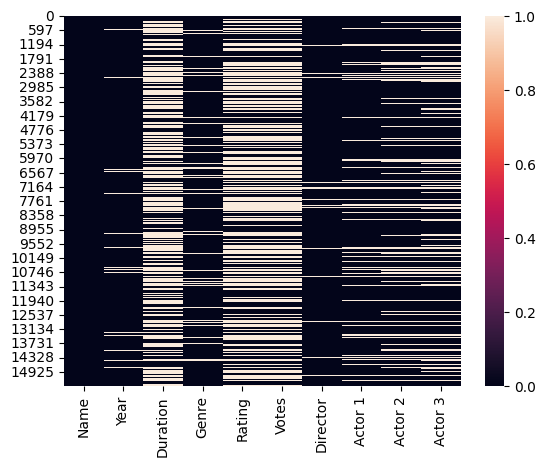

In [6]:
#viewing null values using heatmap
sns.heatmap(movie_data.isnull())

In [7]:
#checking missing values in percentage
movie_data.isna().sum().sort_values() / len(movie_data) *100

Name         0.000000
Director     3.385131
Year         3.404475
Actor 1     10.426204
Genre       12.102650
Actor 2     15.371720
Actor 3     20.272100
Votes       48.932878
Rating      48.939326
Duration    53.317429
dtype: float64

In [8]:
#dropping missing values
movie_data.dropna(inplace=True)
movie_data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
#verifying missing values
movie_data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
movie_data.shape

(5659, 10)

In [11]:
#Distribution of Rating,Duration,Released Year and Votes
def distribution(column):
    global movie_data
    fig=plt.figure(figsize=(8,6))
    sns.displot(x=column, data=movie_data, palette='gist_earth_r',bins=25)
    plt.xlabel(column,fontweight='bold',fontsize=15)
    plt.ylabel('Density',fontweight='bold',fontsize=15)
    plt.title('Distribution of {}'.format(column),fontweight='bold',fontsize=20)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()
    
movie_data['Released_Year']= movie_data.index.astype('int64')

<Figure size 800x600 with 0 Axes>

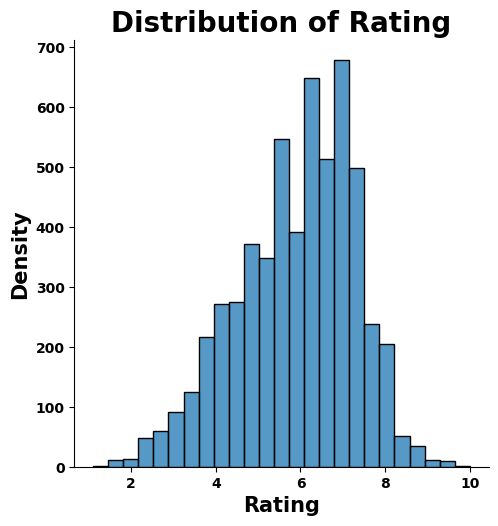

<Figure size 800x600 with 0 Axes>

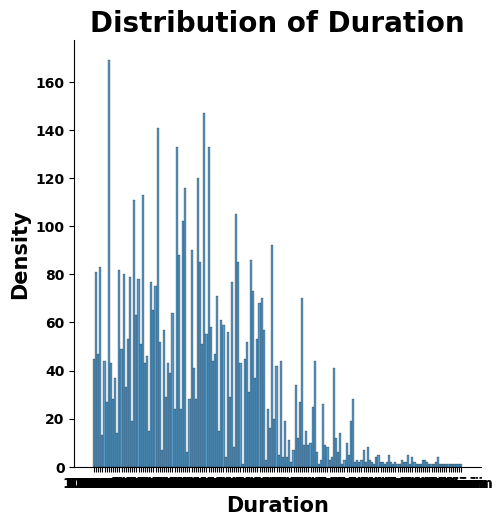

<Figure size 800x600 with 0 Axes>

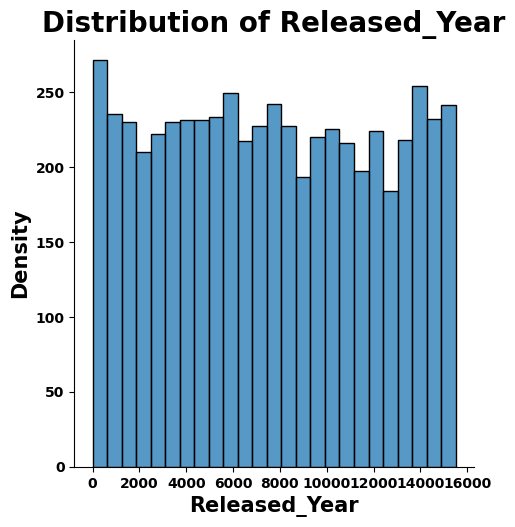

<Figure size 800x600 with 0 Axes>

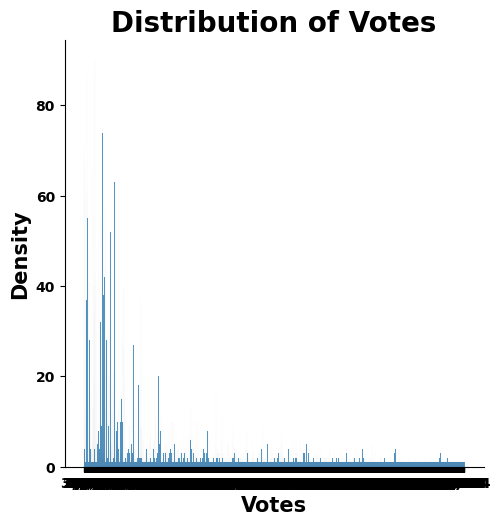

In [12]:
lis=['Rating','Duration','Released_Year','Votes']
i=0
while i< len(lis):
    distribution(lis[i])
    i+=1

In [13]:
#directors with most movies
director_count = dict(movie_data["Director"].value_counts().head(10))
print(director_count)

{'David Dhawan': 41, 'Mahesh Bhatt': 39, 'Ram Gopal Varma': 33, 'Hrishikesh Mukherjee': 33, 'Shakti Samanta': 33, 'Vikram Bhatt': 30, 'Priyadarshan': 29, 'Basu Chatterjee': 23, 'Rama Rao Tatineni': 23, 'Shyam Benegal': 22}


In [14]:
directors = list(director_count.keys())
movie_counts = list(director_count.values())

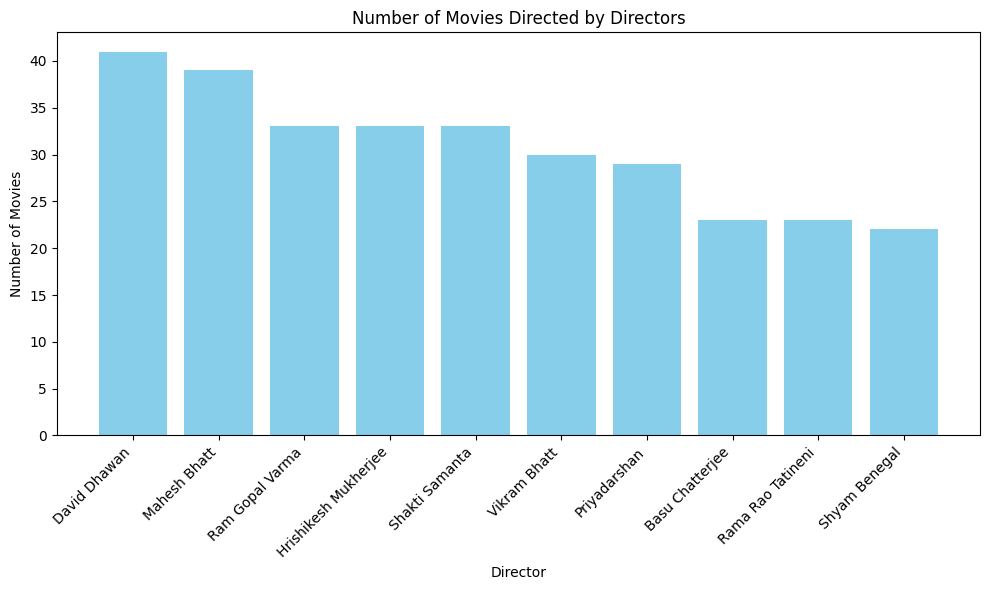

In [15]:
# Create a bar graph
plt.figure(figsize=(10, 6))  
plt.bar(directors, movie_counts, color='skyblue')

# Adding labels and title
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Directed by Directors")

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

In [16]:
#actor appeared on most movies
actor = movie_data["Actor 1"].value_counts().head(10)

actor2 = movie_data["Actor 2"].value_counts().head(10)

actor3 = movie_data["Actor 3"].value_counts().head(10)

In [17]:
#actors most apearance in Movies
Actor1 = movie_data[['Actor 1','Year']].rename(columns = {'Actor 1': 'Actor'}, inplace = False)
Actor2 = movie_data[['Actor 2','Year']].rename(columns = {'Actor 2': 'Actor'}, inplace = False)
Actor3 = movie_data[['Actor 3','Year']].rename(columns = {'Actor 3': 'Actor'}, inplace = False)
Actors = pd.concat([Actor1, Actor2, Actor3], ignore_index=True).dropna()
Actors['Count'] = 1

Actors_count = Actors['Actor'].value_counts().rename_axis('Actor').reset_index(name='Count')

<Axes: xlabel='Count', ylabel='Actor'>

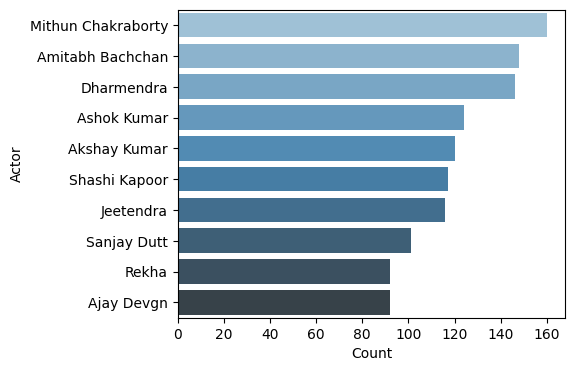

In [18]:
plt.figure(figsize=(5,4))
sns.barplot(x="Count", y="Actor", data=Actors_count[0:10], palette='Blues_d')

In [19]:
#changing the year and duration format 
movie_data['Year']= movie_data['Year'].str.strip('()').astype(int)
movie_data['Duration']=movie_data['Duration'].str.strip(' min')

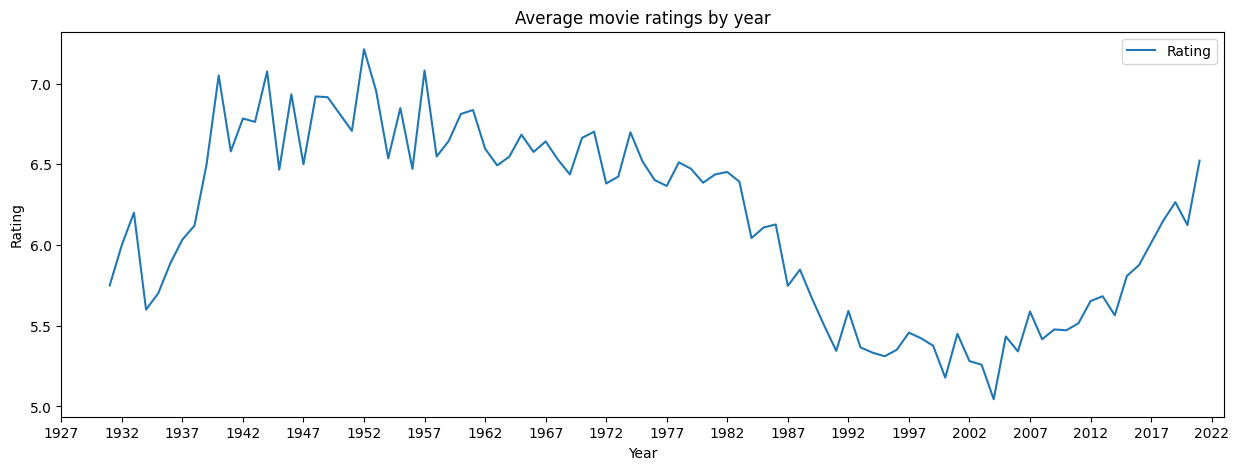

In [20]:
#average rating of movie for every year)
movie_data.groupby('Year')[['Rating']].mean().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average movie ratings by year')
plt.xticks(np.arange(1927,2023,5))
plt.xlim(1927,2023)
plt.show()

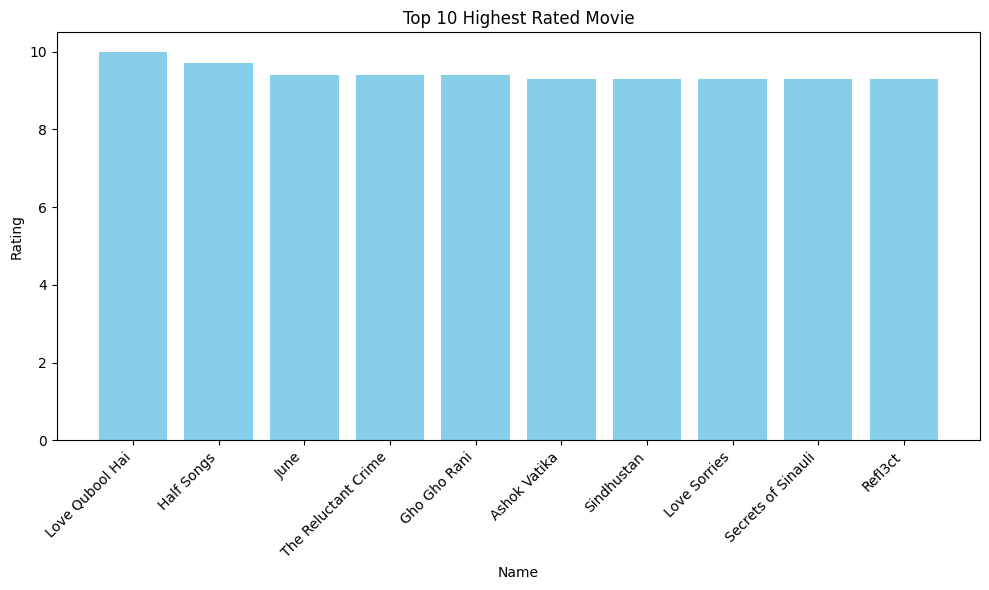

In [21]:
#top 10 movies with best rating
top_10_movies = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]
#top_10_movies

top_10_movies = top_10_movies.sort_values(by='Rating', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies['Name'], top_10_movies['Rating'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Rating')
plt.title('Top 10 Highest Rated Movie')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
#top rated movie for 10-years
movie_data.groupby('Year').apply(pd.DataFrame.nlargest, n=1, columns=['Rating']).head(10)

,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Released_Year
Year,,,,,,,,,,,,
1931,14161,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo,14161
1932,6073,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli,6073
1933,4658,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer,4658
1934,9053,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj,9053
1935,6087,Inquilab,1935,144,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed,6087
1936,6674,Jeevan Naya,1936,140,Drama,7.3,6,Franz Osten,Devika Rani,Ashok Kumar,Kamta Prasad,6674
1937,2325,Bidyapati,1937,141,Drama,7.0,23,Debaki Bose,Pahadi Sanyal,Durgadas Bannerjee,Chhayadevi,2325
1938,1666,Baghban,1938,159,Drama,7.2,8,Abdul Rashid Kardar,Bimla Kumari,B. Nandrekar,Sitara Devi,1666
1939,8187,Leatherface,1939,166,"Action, Adventure",6.6,8,Vijay Bhatt,Paidi Jairaj,Miss Mehtab,Shirin Banu,8187


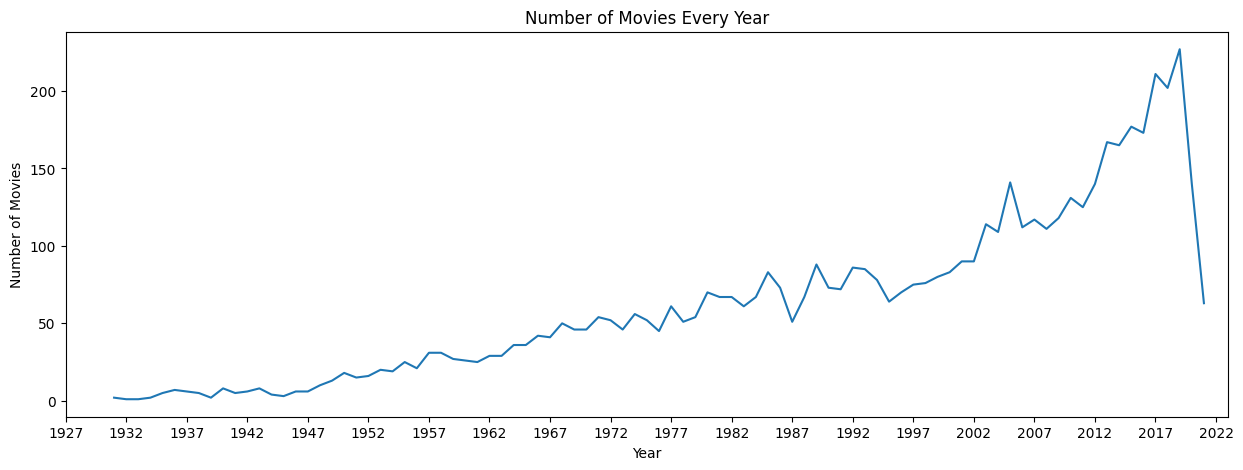

In [23]:
#average number of movies released each year
movie_data.groupby(['Year'])['Name'].count().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Every Year')
plt.xlim(1927,2023)
plt.xticks(np.arange(1927,2023,5))
plt.show()

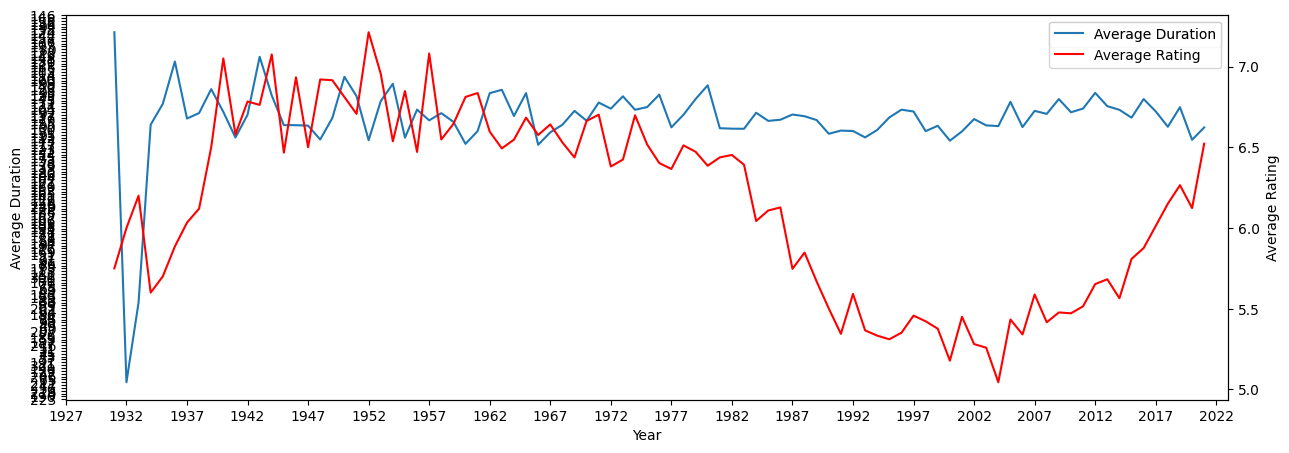

In [24]:
#viewing if there's any relation between length of a movie and its rating
fig,ax1 = plt.subplots(figsize=(15,5))
sns.lineplot(data=movie_data, x='Year',y='Duration',errorbar=None,ax=ax1,label='Average Duration')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Duration')
ax1.set_xlim(1927,2023)
ax1.set_xticks(np.arange(1927,2023,5))

ax2 = ax1.twinx()
sns.lineplot(data=movie_data, x='Year', y='Rating', errorbar=None, ax=ax2, color='red', label='Average Rating')
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

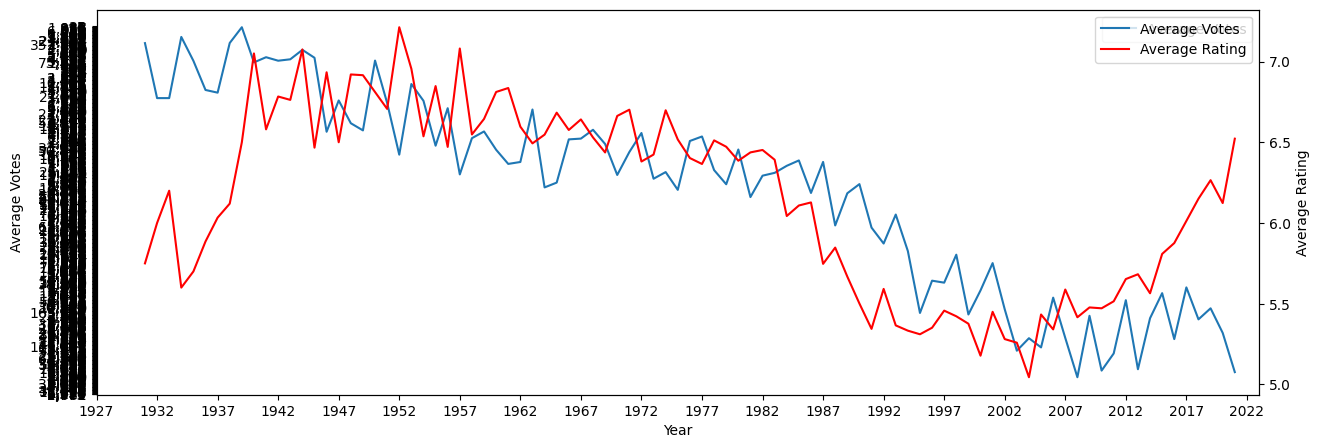

In [25]:
#average votes for that rating in that year
fig,ax1 = plt.subplots(figsize=(15,5))
sns.lineplot(data=movie_data, x='Year',y='Votes',errorbar=None,ax=ax1,label='Average Votes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Votes')
ax1.set_xlim(1927,2023)
ax1.set_xticks(np.arange(1927,2023,5))

ax2 = ax1.twinx()
sns.lineplot(data=movie_data, x='Year', y='Rating', errorbar=None, ax=ax2, color='red', label='Average Rating')
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

In [26]:
#Counting the total numbers of genre
genres = movie_data['Genre']
#genre.head()
genre_counts={}

for item in genres:
    genre_name = item.split(",")
    #print(genre_name)
    for genre in genre_name:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

#merging same genre
merged_genre_counts={}
for genre, count in genre_counts.items():
    genre = genre.strip()  # Remove leading/trailing whitespace
    if genre in merged_genre_counts:
        merged_genre_counts[genre] += count
    else:
        merged_genre_counts[genre] = count
print(merged_genre_counts)

#for genre, count in genre_counts.items():
    #print(f"{genre}: {count}")
            

{'Drama': 3796, 'Comedy': 1344, 'Romance': 1380, 'Musical': 412, 'War': 33, 'Horror': 202, 'Mystery': 304, 'Thriller': 679, 'Action': 1686, 'Crime': 875, 'History': 99, 'Adventure': 277, 'Sci-Fi': 32, 'Sport': 40, 'Biography': 115, 'Family': 416, 'Fantasy': 146, 'Documentary': 48, 'Music': 53, 'Animation': 40, 'News': 1, 'Western': 1}


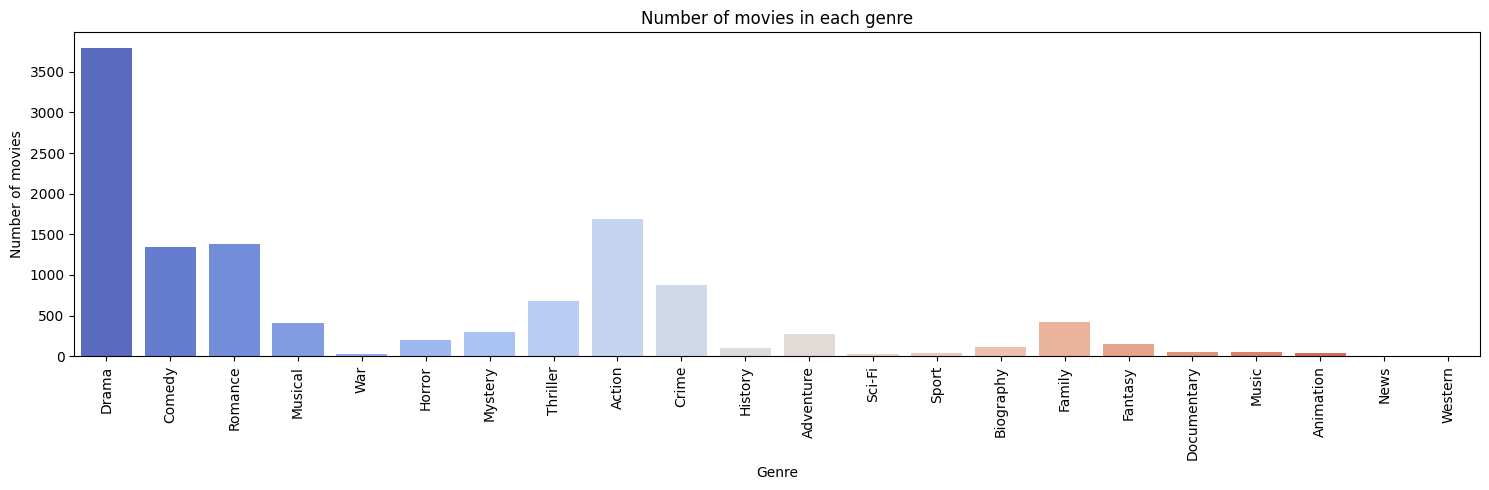

In [27]:
genres = list(merged_genre_counts.keys())
counts = list(merged_genre_counts.values())
#print(genres)
#print(counts)

#visualizing the genres counts
plt.figure(figsize=(15,5))
sns.barplot(x=genres, y=counts, palette='coolwarm')
#plt.bar(genres, count)

plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [28]:
# Sort the items by count in descending order / Top 5 genre
sorted_genre_counts = sorted(merged_genre_counts.items(), key=lambda x: x[1], reverse=True)
top_5_genres = sorted_genre_counts[:5]
df = pd.DataFrame(top_5_genres, columns=['Genre', 'Count'])
df

,Genre,Count
0,Drama,3796
1,Action,1686
2,Romance,1380
3,Comedy,1344
4,Crime,875


In [29]:
#splitting the data
from sklearn.model_selection import train_test_split

In [30]:
X = movie_data.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3','Released_Year'], axis=1)

In [33]:
X.head()

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,"1,086"
8,2012,82,326


In [34]:
#removing comma and converting th column into float
X['Votes'] = X['Votes'].str.replace(',', '').astype(float)

In [35]:
y = movie_data['Rating']
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [51]:
#modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score as score

In [53]:
#fitting data into model using liner regression, randomforest and knn
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Accuracy = {:0.2f}%".format(score(y_test, lr_preds)*100))

Accuracy = 9.80%


In [54]:
rfr = RandomForestRegressor(n_estimators=100, random_state=1)
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)
print("Accuracy = {:0.2f}%".format(score(y_test, rfr_preds)*100))

Accuracy = 21.86%


In [55]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)
knn_preds = knr.predict(X_test)
print("Accuracy = {:0.2f}%".format(score(y_test, rfr_preds)*100))

Accuracy = 21.86%
